<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Mini%20Project%204/MP4_Q1%26Q2_MLP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1

##McCulloch_Pitts_neuron

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

 #define Muculloch pittis
class McCulloch_Pitts_neuron():
  def __init__(self, weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, X ):
    if ((self.weights @ X)  + self.threshold) >= 0 :
      return 1
    else :
      return 0

##Model for the data set

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6 )
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2 )
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0 )
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3 )

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

##The first model=>No Activation Function

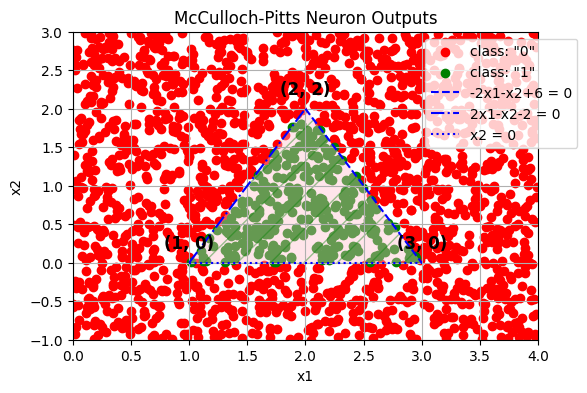

In [ ]:
num_point = 2000
x_val = np.random.uniform( 0 , 4 , num_point )
y_val = np.random.uniform( -1 , 3 , num_point )

red_point = []
green_point = []

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))

plt.show()

##Adding Activation Functions

###Sigmoid

In [ ]:
tol = 0.00001

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


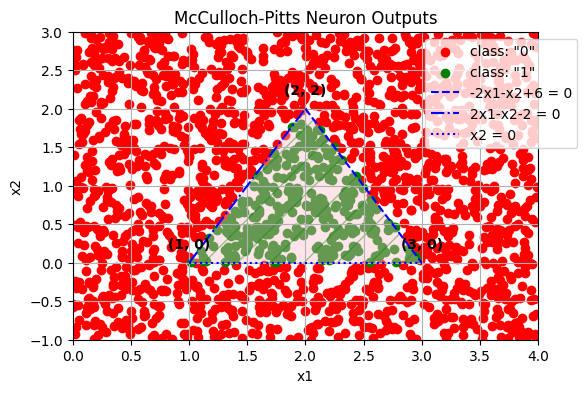

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(sigmoid)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

#-----------------------------------------------------------
red_point = []      # outside zone
green_point = []    #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag < [0.5] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 10)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')
# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

###Relu

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

In [ ]:

def relu(x):
    return np.maximum(0, x)

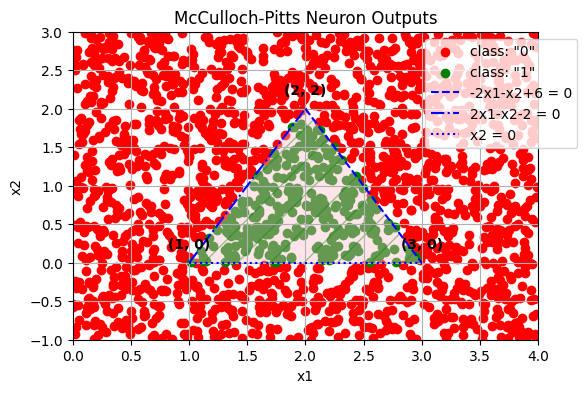

In [ ]:

def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(relu)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(relu)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  # neur3.set_activation_function(relu)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(relu)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])
#-------------------------------------------------------------

red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 10)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--' , label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

#Question 2

##Loading Dataset

In [ ]:
#https://drive.google.com/file/d/1XVvNGAQe9HDC89RvqTil7lat4iO1LoRQ/view?usp=sharing
!gdown 1XVvNGAQe9HDC89RvqTil7lat4iO1LoRQ

Downloading...
From: https://drive.google.com/uc?id=1XVvNGAQe9HDC89RvqTil7lat4iO1LoRQ
To: /content/weather_prediction_dataset.csv
100% 2.77M/2.77M [00:00<00:00, 114MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv('/content/weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


##French cities data

In [ ]:
df.columns.tolist()

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_max',
 'DE_BILT_cloud_cover',
 'DE_BILT_wind_speed',
 'DE_BILT_wind_gust',
 'DE_BILT_humidity',
 'DE_BILT_pressure',
 'DE_BILT_global_radiation',
 'DE_BILT_precipitation',
 'DE_BILT_sunshine',
 'DE_BILT_temp_mean',
 'DE_BILT_temp_min',
 'DE_BILT_temp_max',
 'DRESDEN_cloud_cover',
 'DRESDEN_wind_speed',
 'DRESDEN_wind_gust',
 'DRESDEN_humidity',
 'DRESDEN_global_radiation',
 'DRESDEN_precipitation',
 'DRESDEN_sunshine',
 'DRESDEN_temp_mean',
 'DRESDEN_temp_min',
 'DRESDEN_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_wind_gust',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pres

In [ ]:
import pandas as pd

# Assuming your DataFrame df is already loaded with the given columns

# List of columns you want to keep
columns= [
    'DATE',
    'MONTH',
    'MONTELIMAR_wind_speed',
    'MONTELIMAR_humidity',
    'MONTELIMAR_pressure',
    'MONTELIMAR_global_radiation',
    'MONTELIMAR_precipitation',
    'MONTELIMAR_temp_mean',
    'MONTELIMAR_temp_min',
    'MONTELIMAR_temp_max',
    'PERPIGNAN_wind_speed',
    'PERPIGNAN_humidity',
    'PERPIGNAN_pressure',
    'PERPIGNAN_global_radiation',
    'PERPIGNAN_precipitation',
    'PERPIGNAN_temp_mean',
    'PERPIGNAN_temp_min',
    'PERPIGNAN_temp_max',
    'TOURS_wind_speed',
    'TOURS_humidity',
    'TOURS_pressure',
    'TOURS_global_radiation',
    'TOURS_precipitation',
    'TOURS_temp_mean',
    'TOURS_temp_min',
    'TOURS_temp_max'
]

df_French= df[columns].copy()
df_French

,DATE,MONTH,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,3.8,0.85,1.0269,0.30,0.00,5.5,2.5,8.5,...,10.3,14.0,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,5.8,0.82,1.0287,0.54,0.00,8.3,6.8,9.8,...,5.1,14.6,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,0.4,0.92,1.0316,0.53,0.00,3.2,-2.1,8.5,...,4.1,13.2,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,1.1,0.85,1.0274,0.64,0.00,7.2,2.3,12.1,...,4.3,12.8,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,3.4,0.82,1.0234,0.70,0.00,8.2,1.5,14.8,...,3.6,14.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.4,0.87,1.0077,0.17,0.00,3.6,0.6,6.6,...,4.1,12.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,1.8,0.84,1.0060,0.33,0.16,9.4,6.0,12.7,...,4.8,14.1,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,0.9,0.94,1.0006,0.30,0.78,10.8,7.8,13.7,...,9.5,14.3,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,0.3,0.90,0.9954,0.59,0.66,11.2,6.9,15.4,...,5.3,12.2,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


##Samples

In [ ]:

df_French.sample(5)


,DATE,MONTH,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
351,20001217,12,2.5,0.77,1.0186,0.53,0.00,5.8,2.5,9.2,...,3.8,15.7,3.1,0.90,1.0157,0.43,0.28,6.0,3.1,9.0
2322,20060511,5,2.8,0.61,1.0168,3.25,0.00,16.0,9.8,22.1,...,8.8,19.6,2.9,0.77,1.0160,2.84,0.00,13.6,5.6,21.5
2431,20060828,8,2.1,0.66,1.0145,1.52,0.12,18.9,14.0,23.8,...,18.7,30.0,4.1,0.82,1.0140,0.91,0.20,16.6,13.9,19.4
2250,20060228,2,3.0,0.57,1.0124,1.37,0.00,3.2,-1.0,7.3,...,2.4,9.3,5.0,0.81,1.0110,0.63,0.24,3.9,1.4,6.4
3628,20091207,12,0.4,0.96,1.0151,0.10,0.30,10.2,8.3,12.1,...,10.5,14.9,4.5,0.89,1.0095,0.26,0.66,8.0,4.3,11.8


##Date/time=>change the format

In [ ]:
df_French['DATE'] = pd.to_datetime(df_French['DATE'], format='%Y%m%d')
print(df_French.head())

        DATE  MONTH  MONTELIMAR_wind_speed  MONTELIMAR_humidity  \
0 2000-01-01      1                    3.8                 0.85   
1 2000-01-02      1                    5.8                 0.82   
2 2000-01-03      1                    0.4                 0.92   
3 2000-01-04      1                    1.1                 0.85   
4 2000-01-05      1                    3.4                 0.82   

   MONTELIMAR_pressure  MONTELIMAR_global_radiation  MONTELIMAR_precipitation  \
0               1.0269                         0.30                       0.0   
1               1.0287                         0.54                       0.0   
2               1.0316                         0.53                       0.0   
3               1.0274                         0.64                       0.0   
4               1.0234                         0.70                       0.0   

   MONTELIMAR_temp_mean  MONTELIMAR_temp_min  MONTELIMAR_temp_max  ...  \
0                   5.5             

##1.Train/test

In [ ]:
df_test = df_French[df_French['DATE'].dt.year == 2009].copy()
df_train = df_French[df_French['DATE'].dt.year != 2009].copy()


In [ ]:
target_column = 'MONTELIMAR_temp_mean'


##2.Sliding window

In [ ]:
import numpy as np
def sliding_windows(data, window_size, overlap_size):
    windows = []
    step = window_size - overlap_size
    for i in range(0, len(data) - window_size + 1, step):
        windows.append(data.iloc[i : i + window_size].values)
    return windows
window_size = 5
overlap_size = 4
train_data_features = df_train.drop(columns=['DATE', 'MONTH'])
test_data_features = df_test.drop(columns=['DATE', 'MONTH'])
train_windows = sliding_windows(train_data_features, window_size, overlap_size)
test_windows =sliding_windows(test_data_features, window_size, overlap_size)
train_windows = np.array(train_windows)
test_windows = np.array(test_windows)

print("Shape of train_windows:", train_windows.shape)
print("Shape of test_windows:", test_windows.shape)

Shape of train_windows: (3285, 5, 24)
Shape of test_windows: (361, 5, 24)


In [ ]:
train_windows.shape

(3285, 5, 24)

In [ ]:
test_windows.shape

(361, 5, 24)

##3.Normalize=>Min Max Scaler(article approach)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_windows_flat = train_windows.reshape(-1, train_windows.shape[-1])
scaler.fit(train_windows_flat)

normalized_train_windows = scaler.transform(train_windows.reshape(-1, train_windows.shape[-1])).reshape(train_windows.shape)
normalized_test_windows = scaler.transform(test_windows.reshape(-1, test_windows.shape[-1])).reshape(test_windows.shape)

##Collaborative Learning Approach

##4. MONTELIMAR city Estimations

###Temprature Estimation

In [ ]:
feature_columns = df_French.drop(columns=['DATE', 'MONTH']).columns.tolist()


In [ ]:
indices = [
    i for i, col in enumerate(feature_columns)
    if 'humidity' in col.lower() or 'temp_mean' in col.lower()
]

In [ ]:

print([feature_columns[i] for i in indices])

['MONTELIMAR_humidity', 'MONTELIMAR_temp_mean', 'PERPIGNAN_humidity', 'PERPIGNAN_temp_mean', 'TOURS_humidity', 'TOURS_temp_mean']


In [ ]:
target_column_index = feature_columns.index(target_column)

X_train = train_windows[:, :-1, indices]

y_train = train_windows[:, -1, target_column_index]


X_test = test_windows[:, :-1, indices]

y_test = test_windows[:, -1, target_column_index]

print("Shape of X_train (samples, past_days, selected_features):", X_train.shape)
print("Shape of y_train (samples):", y_train.shape)
print("Shape of X_test (samples, past_days, selected_features):", X_test.shape)
print("Shape of y_test (samples):", y_test.shape)


Shape of X_train (samples, past_days, selected_features): (3285, 4, 6)
Shape of y_train (samples): (3285,)
Shape of X_test (samples, past_days, selected_features): (361, 4, 6)
Shape of y_test (samples): (361,)


####MLP=> 1 hidden layer


Training with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 17.7513, Test Loss: 4.3427
Epoch [2/200], Train Loss: 3.1152, Test Loss: 3.1687
Epoch [3/200], Train Loss: 2.9615, Test Loss: 3.0508
Epoch [4/200], Train Loss: 2.8638, Test Loss: 3.1729
Epoch [5/200], Train Loss: 2.7875, Test Loss: 3.0142
Epoch [6/200], Train Loss: 2.7603, Test Loss: 2.8308
Epoch [7/200], Train Loss: 2.7050, Test Loss: 3.0682
Epoch [8/200], Train Loss: 2.6997, Test Loss: 3.0310
Epoch [9/200], Train Loss: 2.6927, Test Loss: 2.8235
Epoch [10/200], Train Loss: 2.6088, Test Loss: 2.7562
Epoch [11/200], Train Loss: 2.6108, Test Loss: 2.7911
Epoch [12/200], Train Loss: 2.6290, Test Loss: 2.8281
Epoch [13/200], Train Loss: 2.5815, Test Loss: 2.8347
Epoch [14/200], Train Loss: 2.5978, Test Loss: 2.7189
Epoch [15/200], Train Loss: 2.6408, Test Loss: 2.8132
Epoch [16/200], Train Loss: 2.5940, Test Loss: 2.7155
Epoch [17/200], Train Loss: 2.5675, Test Loss: 2.7347
Epoch [18/200], Train Loss: 2.5918, Test Loss: 3.0616
Epoch [19/200], Train Loss: 2.5575, 

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 123.4005, Test Loss: 127.3865
Epoch [2/200], Train Loss: 121.2454, Test Loss: 125.1483
Epoch [3/200], Train Loss: 119.1307, Test Loss: 122.9529
Epoch [4/200], Train Loss: 117.0563, Test Loss: 120.7967
Epoch [5/200], Train Loss: 115.0189, Test Loss: 118.6815
Epoch [6/200], Train Loss: 113.0202, Test Loss: 116.6074
Epoch [7/200], Train Loss: 111.0604, Test Loss: 114.5722
Epoch [8/200], Train Loss: 109.1373, Test Loss: 112.5743
Epoch [9/200], Train Loss: 107.2495, Test Loss: 110.6138
Epoch [10/200], Train Loss: 105.3971, Test Loss: 108.6906
Epoch [11/200], Train Loss: 103.5798, Test Loss: 106.8023
Epoch [12/200], Train Loss: 101.7956, Test Loss: 104.9500
Epoch [13/200], Train Loss: 100.0453, Test Loss: 103.1323
Epoch [14/200], Train Loss: 98.3277, Test Loss: 101.3477
Epoch [15/200], Train Loss: 96.6413, Test Loss: 99.5972
Epoch [16/200], Train Loss: 94.9872, Test Loss: 97.8793
Epoch [17/200], Train Loss: 93.3639, Test Loss: 96.1944
Epoch [18/200], Train Loss: 91

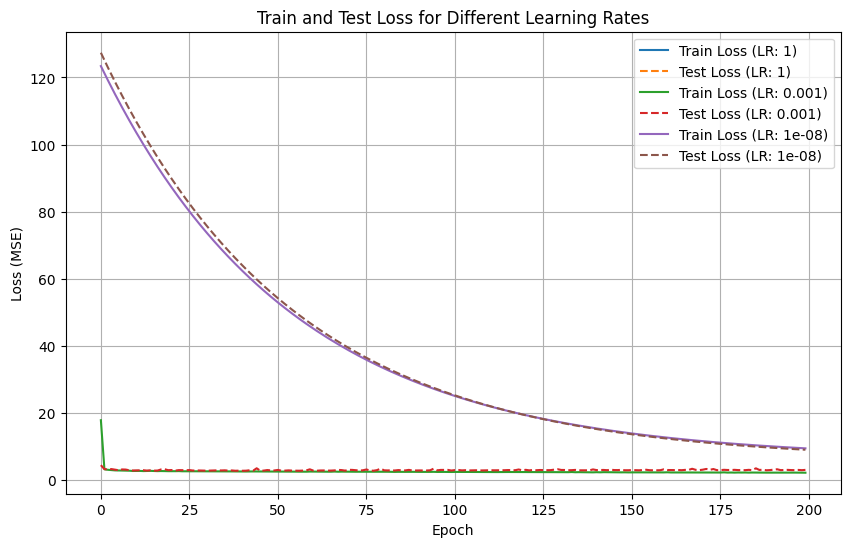

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1] * X_train.shape[2]
hidden_size = 150
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    # Training loop
    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        # Evaluate on test set
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        # Print losses
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_weights_lr_{lr}.pth'
    torch.save(model.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model.state_dict() # Save the final model state dict
    }

# Plotting train and test loss
plt.figure(figsize=(10, 6))
for lr, result in results.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


####MLP=> 2 hidden layers


Training 2-hidden layer MLP with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 103.2601, Test Loss: 141.4160
Epoch [2/200], Train Loss: 132.7460, Test Loss: 54.1465
Epoch [3/200], Train Loss: 46.3198, Test Loss: 30.8742
Epoch [4/200], Train Loss: 36.5791, Test Loss: 30.4825
Epoch [5/200], Train Loss: 35.0007, Test Loss: 7.3261
Epoch [6/200], Train Loss: 22.2482, Test Loss: 62.0399
Epoch [7/200], Train Loss: 31.8639, Test Loss: 5.0405
Epoch [8/200], Train Loss: 21.0655, Test Loss: 67.9872
Epoch [9/200], Train Loss: 28.7533, Test Loss: 51.5989
Epoch [10/200], Train Loss: 18.2540, Test Loss: 41.3590
Epoch [11/200], Train Loss: 19.2714, Test Loss: 6.8971
Epoch [12/200], Train Loss: 20.3430, Test Loss: 4.6873
Epoch [13/200], Train Loss: 21.4721, Test Loss: 10.0548
Epoch [14/200], Train Loss: 18.6404, Test Loss: 13.5104
Epoch [15/200], Train Loss: 19.3761, Test Loss: 15.0695
Epoch [16/200], Train Loss: 18.5934, Test Loss: 5.2638
Epoch [17/200], Train Loss: 14.8253, Test Loss: 5.1117
Epoch [18/200], Train Loss: 11.2749, Test Loss: 4.9971
Epoch

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 257.2511, Test Loss: 282.8381
Epoch [2/200], Train Loss: 256.8023, Test Loss: 282.3505
Epoch [3/200], Train Loss: 256.3552, Test Loss: 281.8635
Epoch [4/200], Train Loss: 255.9087, Test Loss: 281.3786
Epoch [5/200], Train Loss: 255.4643, Test Loss: 280.8957
Epoch [6/200], Train Loss: 255.0215, Test Loss: 280.4156
Epoch [7/200], Train Loss: 254.5811, Test Loss: 279.9364
Epoch [8/200], Train Loss: 254.1414, Test Loss: 279.4584
Epoch [9/200], Train Loss: 253.7029, Test Loss: 278.9822
Epoch [10/200], Train Loss: 253.2662, Test Loss: 278.5083
Epoch [11/200], Train Loss: 252.8315, Test Loss: 278.0358
Epoch [12/200], Train Loss: 252.3981, Test Loss: 277.5646
Epoch [13/200], Train Loss: 251.9656, Test Loss: 277.0952
Epoch [14/200], Train Loss: 251.5347, Test Loss: 276.6282
Epoch [15/200], Train Loss: 251.1058, Test Loss: 276.1622
Epoch [16/200], Train Loss: 250.6777, Test Loss: 275.6983
Epoch [17/200], Train Loss: 250.2514, Test Loss: 275.2362
Epoch [18/200], Train L

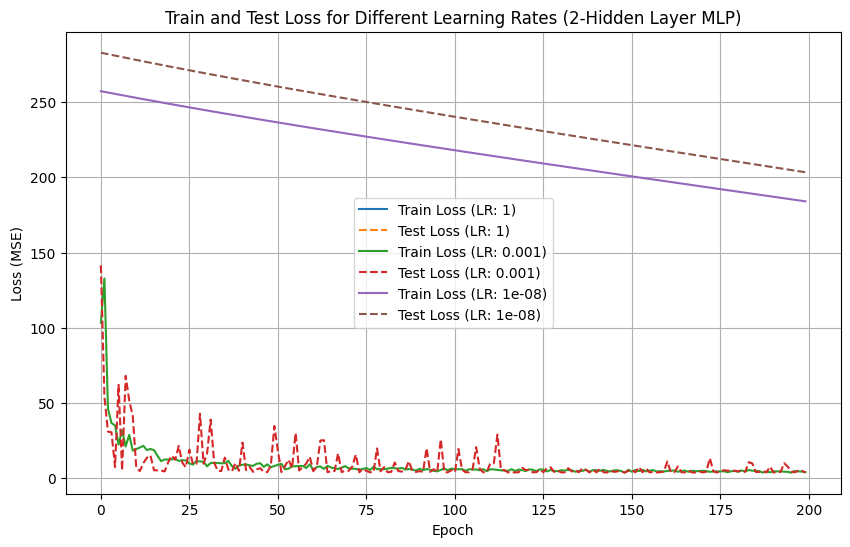

In [ ]:

class MLP_2Hidden(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP_2Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1] * X_train.shape[2]
hidden_size1 = 150
hidden_size2 = 50
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results_2hidden = {}

for lr in learning_rates:
    print(f"\nTraining 2-hidden layer MLP with learning rate: {lr}")
    model_2hidden = MLP_2Hidden(input_size, hidden_size1, hidden_size2, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model_2hidden.parameters(), lr=lr)

    train_losses = []
    test_losses = []


    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model_2hidden.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model_2hidden(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        model_2hidden.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model_2hidden(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_2hidden_weights_lr_{lr}.pth'
    torch.save(model_2hidden.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results_2hidden[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model_2hidden.state_dict()
    }

plt.figure(figsize=(10, 6))
for lr, result in results_2hidden.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates (2-Hidden Layer MLP)')
plt.legend()
plt.grid(True)
plt.show()

###Wind Speed estimation

In [ ]:
target_column_ws = 'MONTELIMAR_wind_speed'

ws = [
    i for i, col in enumerate(feature_columns)
    if 'wind_speed' in col.lower() or 'temp_mean' in col.lower()
]

ws

[0, 5, 8, 13, 16, 21]

In [ ]:
print([feature_columns[i] for i in ws])

['MONTELIMAR_wind_speed', 'MONTELIMAR_temp_mean', 'PERPIGNAN_wind_speed', 'PERPIGNAN_temp_mean', 'TOURS_wind_speed', 'TOURS_temp_mean']


In [ ]:
ws_index= feature_columns.index(target_column_ws)

X_train = train_windows[:, :-1, ws]

y_train = train_windows[:, -1, ws_index]


X_test = test_windows[:, :-1, ws]

y_test = test_windows[:, -1, ws_index]

print("Shape of X_train (samples, past_days, selected_features):", X_train.shape)
print("Shape of y_train (samples):", y_train.shape)
print("Shape of X_test (samples, past_days, selected_features):", X_test.shape)
print("Shape of y_test (samples):", y_test.shape)

Shape of X_train (samples, past_days, selected_features): (3285, 4, 6)
Shape of y_train (samples): (3285,)
Shape of X_test (samples, past_days, selected_features): (361, 4, 6)
Shape of y_test (samples): (361,)


####MLP=> 1 hidden layer


Training with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 13.1676, Test Loss: 3.6936
Epoch [2/200], Train Loss: 3.2013, Test Loss: 3.1261
Epoch [3/200], Train Loss: 3.0470, Test Loss: 2.7665
Epoch [4/200], Train Loss: 2.8858, Test Loss: 2.7566
Epoch [5/200], Train Loss: 2.7919, Test Loss: 2.6686
Epoch [6/200], Train Loss: 2.7807, Test Loss: 2.6599
Epoch [7/200], Train Loss: 2.7531, Test Loss: 2.7506
Epoch [8/200], Train Loss: 2.7170, Test Loss: 2.7199
Epoch [9/200], Train Loss: 2.7193, Test Loss: 2.6313
Epoch [10/200], Train Loss: 2.6499, Test Loss: 2.6652
Epoch [11/200], Train Loss: 2.6859, Test Loss: 3.1462
Epoch [12/200], Train Loss: 2.6423, Test Loss: 2.6953
Epoch [13/200], Train Loss: 2.6675, Test Loss: 2.6742
Epoch [14/200], Train Loss: 2.6109, Test Loss: 2.7881
Epoch [15/200], Train Loss: 2.6002, Test Loss: 2.6018
Epoch [16/200], Train Loss: 2.6101, Test Loss: 2.5917
Epoch [17/200], Train Loss: 2.5720, Test Loss: 3.1680
Epoch [18/200], Train Loss: 2.5929, Test Loss: 2.6076
Epoch [19/200], Train Loss: 2.6136, 

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 7.2502, Test Loss: 6.5704
Epoch [2/200], Train Loss: 7.2495, Test Loss: 6.5698
Epoch [3/200], Train Loss: 7.2488, Test Loss: 6.5691
Epoch [4/200], Train Loss: 7.2481, Test Loss: 6.5685
Epoch [5/200], Train Loss: 7.2474, Test Loss: 6.5679
Epoch [6/200], Train Loss: 7.2467, Test Loss: 6.5673
Epoch [7/200], Train Loss: 7.2460, Test Loss: 6.5666
Epoch [8/200], Train Loss: 7.2453, Test Loss: 6.5660
Epoch [9/200], Train Loss: 7.2446, Test Loss: 6.5654
Epoch [10/200], Train Loss: 7.2439, Test Loss: 6.5647
Epoch [11/200], Train Loss: 7.2432, Test Loss: 6.5641
Epoch [12/200], Train Loss: 7.2425, Test Loss: 6.5635
Epoch [13/200], Train Loss: 7.2418, Test Loss: 6.5629
Epoch [14/200], Train Loss: 7.2411, Test Loss: 6.5622
Epoch [15/200], Train Loss: 7.2404, Test Loss: 6.5616
Epoch [16/200], Train Loss: 7.2397, Test Loss: 6.5610
Epoch [17/200], Train Loss: 7.2390, Test Loss: 6.5603
Epoch [18/200], Train Loss: 7.2383, Test Loss: 6.5597
Epoch [19/200], Train Loss: 7.2376, T

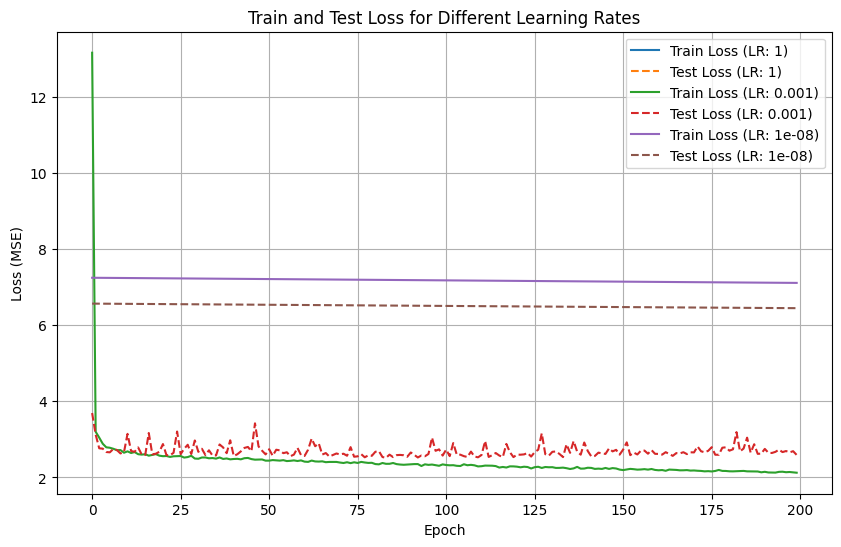

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1] * X_train.shape[2]
hidden_size = 150
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    # Training loop
    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        # Evaluate on test set
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        # Print losses
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_weights_lr_{lr}.pth'
    torch.save(model.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model.state_dict() # Save the final model state dict
    }

# Plotting train and test loss
plt.figure(figsize=(10, 6))
for lr, result in results.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


####MLP=> 2 hidden layers


Training 2-hidden layer MLP with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 4.6060, Test Loss: 4.6172
Epoch [2/200], Train Loss: 3.2297, Test Loss: 3.1936
Epoch [3/200], Train Loss: 3.0574, Test Loss: 2.9531
Epoch [4/200], Train Loss: 3.0850, Test Loss: 3.8498
Epoch [5/200], Train Loss: 2.9933, Test Loss: 2.7171
Epoch [6/200], Train Loss: 2.8873, Test Loss: 2.7341
Epoch [7/200], Train Loss: 2.8132, Test Loss: 2.5541
Epoch [8/200], Train Loss: 2.7802, Test Loss: 3.3109
Epoch [9/200], Train Loss: 2.7422, Test Loss: 2.6565
Epoch [10/200], Train Loss: 2.7760, Test Loss: 3.0678
Epoch [11/200], Train Loss: 2.7576, Test Loss: 2.5377
Epoch [12/200], Train Loss: 2.6836, Test Loss: 2.6580
Epoch [13/200], Train Loss: 2.7057, Test Loss: 2.5772
Epoch [14/200], Train Loss: 2.7552, Test Loss: 2.6815
Epoch [15/200], Train Loss: 2.6675, Test Loss: 3.9712
Epoch [16/200], Train Loss: 2.6219, Test Loss: 2.6138
Epoch [17/200], Train Loss: 2.7098, Test Loss: 2.5837
Epoch [18/200], Train Loss: 2.6351, Test Loss: 2.5483
Epoch [19/200], Train Loss: 2.6255, T

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 19.0853, Test Loss: 18.5580
Epoch [2/200], Train Loss: 19.0357, Test Loss: 18.5073
Epoch [3/200], Train Loss: 18.9864, Test Loss: 18.4568
Epoch [4/200], Train Loss: 18.9373, Test Loss: 18.4064
Epoch [5/200], Train Loss: 18.8884, Test Loss: 18.3563
Epoch [6/200], Train Loss: 18.8397, Test Loss: 18.3064
Epoch [7/200], Train Loss: 18.7912, Test Loss: 18.2568
Epoch [8/200], Train Loss: 18.7429, Test Loss: 18.2074
Epoch [9/200], Train Loss: 18.6949, Test Loss: 18.1582
Epoch [10/200], Train Loss: 18.6470, Test Loss: 18.1092
Epoch [11/200], Train Loss: 18.5994, Test Loss: 18.0605
Epoch [12/200], Train Loss: 18.5520, Test Loss: 18.0119
Epoch [13/200], Train Loss: 18.5047, Test Loss: 17.9636
Epoch [14/200], Train Loss: 18.4577, Test Loss: 17.9155
Epoch [15/200], Train Loss: 18.4109, Test Loss: 17.8676
Epoch [16/200], Train Loss: 18.3643, Test Loss: 17.8198
Epoch [17/200], Train Loss: 18.3179, Test Loss: 17.7723
Epoch [18/200], Train Loss: 18.2717, Test Loss: 17.7251
E

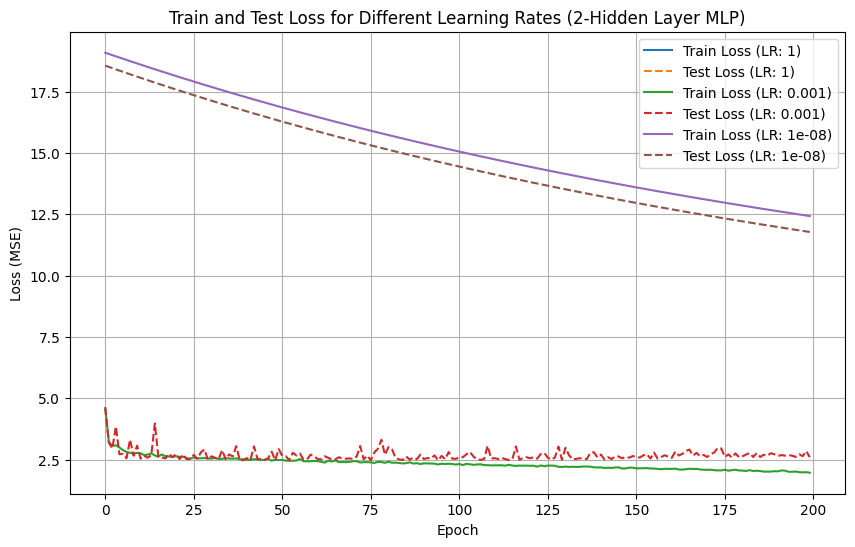

In [ ]:

class MLP_2Hidden(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP_2Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1] * X_train.shape[2]
hidden_size1 = 150
hidden_size2 = 50
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results_2hidden = {}

for lr in learning_rates:
    print(f"\nTraining 2-hidden layer MLP with learning rate: {lr}")
    model_2hidden = MLP_2Hidden(input_size, hidden_size1, hidden_size2, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model_2hidden.parameters(), lr=lr)

    train_losses = []
    test_losses = []


    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model_2hidden.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model_2hidden(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        model_2hidden.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model_2hidden(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_2hidden_weights_lr_{lr}.pth'
    torch.save(model_2hidden.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results_2hidden[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model_2hidden.state_dict()
    }

plt.figure(figsize=(10, 6))
for lr, result in results_2hidden.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates (2-Hidden Layer MLP)')
plt.legend()
plt.grid(True)
plt.show()

###Pressure Estimation

In [ ]:

target_column_p = 'MONTELIMAR_pressure'

p = [
    i for i, col in enumerate(feature_columns)
    if 'pressure' in col.lower() or 'temp_mean' in col.lower()
]


print([feature_columns[i] for i in p])
p_index = feature_columns.index(target_column_p)

X_train = train_windows[:, :-1, p]

y_train = train_windows[:, -1, p_index]


X_test = test_windows[:, :-1, p]

y_test = test_windows[:, -1, p_index]

print("Shape of X_train (samples, past_days, selected_features):", X_train.shape)
print("Shape of y_train (samples):", y_train.shape)
print("Shape of X_test (samples, past_days, selected_features):", X_test.shape)
print("Shape of y_test (samples):", y_test.shape)


['MONTELIMAR_pressure', 'MONTELIMAR_temp_mean', 'PERPIGNAN_pressure', 'PERPIGNAN_temp_mean', 'TOURS_pressure', 'TOURS_temp_mean']
Shape of X_train (samples, past_days, selected_features): (3285, 4, 6)
Shape of y_train (samples): (3285,)
Shape of X_test (samples, past_days, selected_features): (361, 4, 6)
Shape of y_test (samples): (361,)


####MLP=> 1 hidden layer


Training with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 15.8478, Test Loss: 1.2785
Epoch [2/200], Train Loss: 0.2748, Test Loss: 0.8401
Epoch [3/200], Train Loss: 0.1888, Test Loss: 0.5921
Epoch [4/200], Train Loss: 0.1383, Test Loss: 0.4410
Epoch [5/200], Train Loss: 0.1056, Test Loss: 0.3444
Epoch [6/200], Train Loss: 0.0856, Test Loss: 0.2811
Epoch [7/200], Train Loss: 0.0734, Test Loss: 0.2355
Epoch [8/200], Train Loss: 0.0645, Test Loss: 0.2008
Epoch [9/200], Train Loss: 0.0574, Test Loss: 0.1756
Epoch [10/200], Train Loss: 0.0521, Test Loss: 0.1569
Epoch [11/200], Train Loss: 0.0477, Test Loss: 0.1428
Epoch [12/200], Train Loss: 0.0441, Test Loss: 0.1308
Epoch [13/200], Train Loss: 0.0409, Test Loss: 0.1210
Epoch [14/200], Train Loss: 0.0381, Test Loss: 0.1130
Epoch [15/200], Train Loss: 0.0357, Test Loss: 0.1064
Epoch [16/200], Train Loss: 0.0335, Test Loss: 0.1004
Epoch [17/200], Train Loss: 0.0315, Test Loss: 0.0951
Epoch [18/200], Train Loss: 0.0296, Test Loss: 0.0904
Epoch [19/200], Train Loss: 0.0279, 

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 1.3773, Test Loss: 1.3011
Epoch [2/200], Train Loss: 1.3691, Test Loss: 1.2933
Epoch [3/200], Train Loss: 1.3611, Test Loss: 1.2856
Epoch [4/200], Train Loss: 1.3532, Test Loss: 1.2780
Epoch [5/200], Train Loss: 1.3453, Test Loss: 1.2706
Epoch [6/200], Train Loss: 1.3375, Test Loss: 1.2632
Epoch [7/200], Train Loss: 1.3299, Test Loss: 1.2558
Epoch [8/200], Train Loss: 1.3223, Test Loss: 1.2486
Epoch [9/200], Train Loss: 1.3148, Test Loss: 1.2415
Epoch [10/200], Train Loss: 1.3073, Test Loss: 1.2344
Epoch [11/200], Train Loss: 1.3000, Test Loss: 1.2274
Epoch [12/200], Train Loss: 1.2927, Test Loss: 1.2206
Epoch [13/200], Train Loss: 1.2856, Test Loss: 1.2138
Epoch [14/200], Train Loss: 1.2785, Test Loss: 1.2070
Epoch [15/200], Train Loss: 1.2715, Test Loss: 1.2004
Epoch [16/200], Train Loss: 1.2645, Test Loss: 1.1938
Epoch [17/200], Train Loss: 1.2577, Test Loss: 1.1873
Epoch [18/200], Train Loss: 1.2509, Test Loss: 1.1809
Epoch [19/200], Train Loss: 1.2442, T

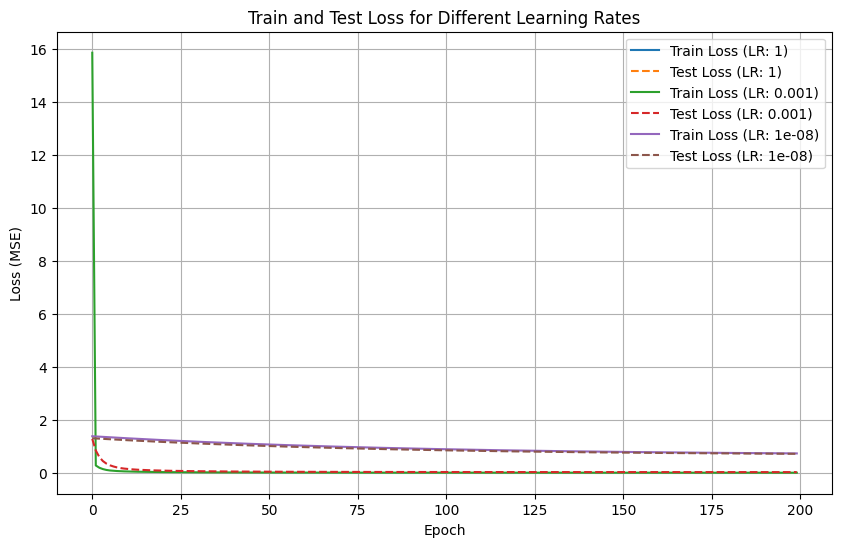

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1] * X_train.shape[2]
hidden_size = 100
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    # Training loop
    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        # Evaluate on test set
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        # Print losses
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_weights_lr_{lr}.pth'
    torch.save(model.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model.state_dict() # Save the final model state dict
    }

# Plotting train and test loss
plt.figure(figsize=(10, 6))
for lr, result in results.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


####MLP=> 2 hidden layers


Training 2-hidden layer MLP with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 0.1418, Test Loss: 0.0922
Epoch [2/200], Train Loss: 0.0796, Test Loss: 0.0637
Epoch [3/200], Train Loss: 0.0573, Test Loss: 0.0450
Epoch [4/200], Train Loss: 0.0451, Test Loss: 0.0379
Epoch [5/200], Train Loss: 0.0368, Test Loss: 0.0319
Epoch [6/200], Train Loss: 0.0307, Test Loss: 0.0300
Epoch [7/200], Train Loss: 0.0277, Test Loss: 0.0349
Epoch [8/200], Train Loss: 0.0246, Test Loss: 0.0212
Epoch [9/200], Train Loss: 0.0217, Test Loss: 0.0204
Epoch [10/200], Train Loss: 0.0192, Test Loss: 0.0173
Epoch [11/200], Train Loss: 0.0179, Test Loss: 0.0172
Epoch [12/200], Train Loss: 0.0164, Test Loss: 0.0154
Epoch [13/200], Train Loss: 0.0149, Test Loss: 0.0136
Epoch [14/200], Train Loss: 0.0138, Test Loss: 0.0137
Epoch [15/200], Train Loss: 0.0126, Test Loss: 0.0118
Epoch [16/200], Train Loss: 0.0120, Test Loss: 0.0105
Epoch [17/200], Train Loss: 0.0106, Test Loss: 0.0228
Epoch [18/200], Train Loss: 0.0101, Test Loss: 0.0096
Epoch [19/200], Train Loss: 0.0091, T

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 0.3067, Test Loss: 0.3394
Epoch [2/200], Train Loss: 0.3059, Test Loss: 0.3385
Epoch [3/200], Train Loss: 0.3052, Test Loss: 0.3376
Epoch [4/200], Train Loss: 0.3044, Test Loss: 0.3368
Epoch [5/200], Train Loss: 0.3036, Test Loss: 0.3359
Epoch [6/200], Train Loss: 0.3028, Test Loss: 0.3351
Epoch [7/200], Train Loss: 0.3021, Test Loss: 0.3342
Epoch [8/200], Train Loss: 0.3013, Test Loss: 0.3334
Epoch [9/200], Train Loss: 0.3006, Test Loss: 0.3325
Epoch [10/200], Train Loss: 0.2998, Test Loss: 0.3317
Epoch [11/200], Train Loss: 0.2991, Test Loss: 0.3308
Epoch [12/200], Train Loss: 0.2983, Test Loss: 0.3300
Epoch [13/200], Train Loss: 0.2976, Test Loss: 0.3292
Epoch [14/200], Train Loss: 0.2968, Test Loss: 0.3284
Epoch [15/200], Train Loss: 0.2961, Test Loss: 0.3275
Epoch [16/200], Train Loss: 0.2954, Test Loss: 0.3267
Epoch [17/200], Train Loss: 0.2946, Test Loss: 0.3259
Epoch [18/200], Train Loss: 0.2939, Test Loss: 0.3251
Epoch [19/200], Train Loss: 0.2932, T

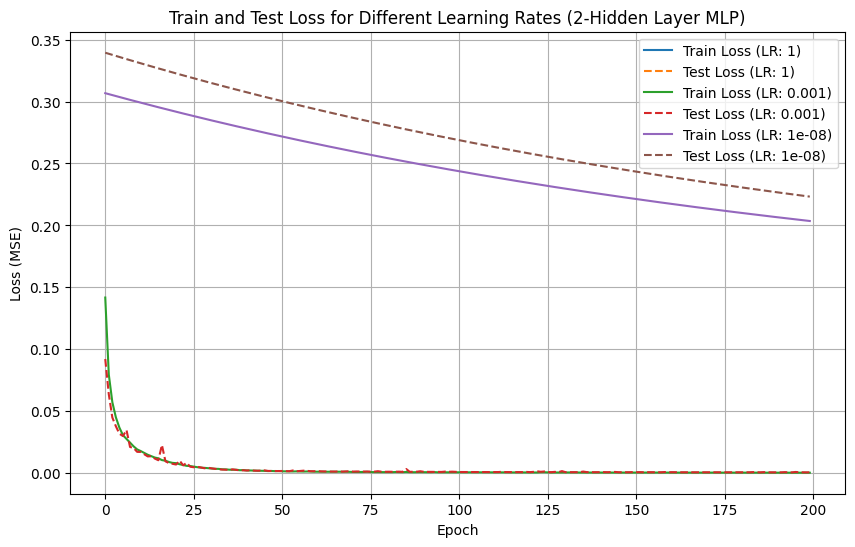

In [ ]:
class MLP_2Hidden(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP_2Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1] * X_train.shape[2]
hidden_size1 = 150
hidden_size2 = 50
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results_2hidden = {}

for lr in learning_rates:
    print(f"\nTraining 2-hidden layer MLP with learning rate: {lr}")
    model_2hidden = MLP_2Hidden(input_size, hidden_size1, hidden_size2, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model_2hidden.parameters(), lr=lr)

    train_losses = []
    test_losses = []


    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model_2hidden.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model_2hidden(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        model_2hidden.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model_2hidden(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_2hidden_weights_lr_{lr}.pth'
    torch.save(model_2hidden.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results_2hidden[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model_2hidden.state_dict()
    }

plt.figure(figsize=(10, 6))
for lr, result in results_2hidden.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates (2-Hidden Layer MLP)')
plt.legend()
plt.grid(True)
plt.show()

###Humidity Estimation

In [ ]:

target_column_h = 'MONTELIMAR_humidity'

h = [
    i for i, col in enumerate(feature_columns)
    if 'humidity' in col.lower() or 'pressure' in col.lower() or 'temp_mean' in col.lower()
]

print([feature_columns[i] for i in h])
h_index = feature_columns.index(target_column_h)

X_train = train_windows[:, :-1, h]

y_train = train_windows[:, -1, h_index]


X_test = test_windows[:, :-1, h]

y_test = test_windows[:, -1, h_index]

print("Shape of X_train (samples, past_days, selected_features):", X_train.shape)
print("Shape of y_train (samples):", y_train.shape)
print("Shape of X_test (samples, past_days, selected_features):", X_test.shape)
print("Shape of y_test (samples):", y_test.shape)

['MONTELIMAR_humidity', 'MONTELIMAR_pressure', 'MONTELIMAR_temp_mean', 'PERPIGNAN_humidity', 'PERPIGNAN_pressure', 'PERPIGNAN_temp_mean', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_temp_mean']
Shape of X_train (samples, past_days, selected_features): (3285, 4, 9)
Shape of y_train (samples): (3285,)
Shape of X_test (samples, past_days, selected_features): (361, 4, 9)
Shape of y_test (samples): (361,)


####MLP=> 1 hidden layer


Training with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 1.0179, Test Loss: 0.0759
Epoch [2/200], Train Loss: 0.0523, Test Loss: 0.0458
Epoch [3/200], Train Loss: 0.0358, Test Loss: 0.0426
Epoch [4/200], Train Loss: 0.0286, Test Loss: 0.0285
Epoch [5/200], Train Loss: 0.0240, Test Loss: 0.0257
Epoch [6/200], Train Loss: 0.0215, Test Loss: 0.0226
Epoch [7/200], Train Loss: 0.0196, Test Loss: 0.0223
Epoch [8/200], Train Loss: 0.0181, Test Loss: 0.0215
Epoch [9/200], Train Loss: 0.0171, Test Loss: 0.0188
Epoch [10/200], Train Loss: 0.0161, Test Loss: 0.0194
Epoch [11/200], Train Loss: 0.0155, Test Loss: 0.0180
Epoch [12/200], Train Loss: 0.0150, Test Loss: 0.0169
Epoch [13/200], Train Loss: 0.0148, Test Loss: 0.0171
Epoch [14/200], Train Loss: 0.0139, Test Loss: 0.0167
Epoch [15/200], Train Loss: 0.0136, Test Loss: 0.0165
Epoch [16/200], Train Loss: 0.0132, Test Loss: 0.0185
Epoch [17/200], Train Loss: 0.0130, Test Loss: 0.0150
Epoch [18/200], Train Loss: 0.0128, Test Loss: 0.0151
Epoch [19/200], Train Loss: 0.0125, T

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 0.7760, Test Loss: 0.9305
Epoch [2/200], Train Loss: 0.7719, Test Loss: 0.9258
Epoch [3/200], Train Loss: 0.7679, Test Loss: 0.9212
Epoch [4/200], Train Loss: 0.7638, Test Loss: 0.9166
Epoch [5/200], Train Loss: 0.7598, Test Loss: 0.9120
Epoch [6/200], Train Loss: 0.7558, Test Loss: 0.9074
Epoch [7/200], Train Loss: 0.7519, Test Loss: 0.9029
Epoch [8/200], Train Loss: 0.7479, Test Loss: 0.8984
Epoch [9/200], Train Loss: 0.7440, Test Loss: 0.8939
Epoch [10/200], Train Loss: 0.7401, Test Loss: 0.8895
Epoch [11/200], Train Loss: 0.7362, Test Loss: 0.8851
Epoch [12/200], Train Loss: 0.7324, Test Loss: 0.8807
Epoch [13/200], Train Loss: 0.7286, Test Loss: 0.8763
Epoch [14/200], Train Loss: 0.7248, Test Loss: 0.8720
Epoch [15/200], Train Loss: 0.7210, Test Loss: 0.8676
Epoch [16/200], Train Loss: 0.7172, Test Loss: 0.8633
Epoch [17/200], Train Loss: 0.7135, Test Loss: 0.8590
Epoch [18/200], Train Loss: 0.7098, Test Loss: 0.8548
Epoch [19/200], Train Loss: 0.7061, T

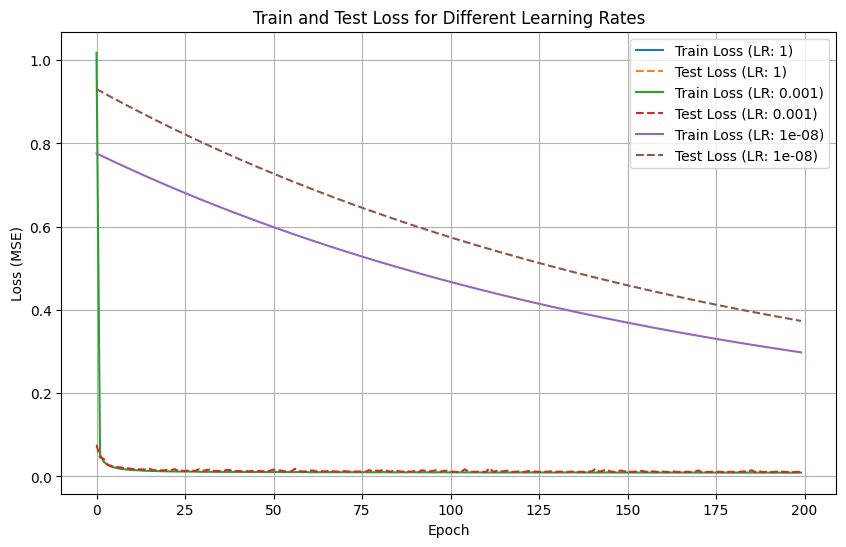

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = X_train.shape[1] * X_train.shape[2]
hidden_size = 100
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    # Training loop
    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        # Evaluate on test set
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        # Print losses
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_weights_lr_{lr}.pth'
    torch.save(model.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model.state_dict() # Save the final model state dict
    }

# Plotting train and test loss
plt.figure(figsize=(10, 6))
for lr, result in results.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


####MLP=> 2 hidden layers


Training 2-hidden layer MLP with learning rate: 1


Training (LR: 1):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: nan, Test Loss: nan
Epoch [2/200], Train Loss: nan, Test Loss: nan
Epoch [3/200], Train Loss: nan, Test Loss: nan
Epoch [4/200], Train Loss: nan, Test Loss: nan
Epoch [5/200], Train Loss: nan, Test Loss: nan
Epoch [6/200], Train Loss: nan, Test Loss: nan
Epoch [7/200], Train Loss: nan, Test Loss: nan
Epoch [8/200], Train Loss: nan, Test Loss: nan
Epoch [9/200], Train Loss: nan, Test Loss: nan
Epoch [10/200], Train Loss: nan, Test Loss: nan
Epoch [11/200], Train Loss: nan, Test Loss: nan
Epoch [12/200], Train Loss: nan, Test Loss: nan
Epoch [13/200], Train Loss: nan, Test Loss: nan
Epoch [14/200], Train Loss: nan, Test Loss: nan
Epoch [15/200], Train Loss: nan, Test Loss: nan
Epoch [16/200], Train Loss: nan, Test Loss: nan
Epoch [17/200], Train Loss: nan, Test Loss: nan
Epoch [18/200], Train Loss: nan, Test Loss: nan
Epoch [19/200], Train Loss: nan, Test Loss: nan
Epoch [20/200], Train Loss: nan, Test Loss: nan
Epoch [21/200], Train Loss: nan, Test Loss: nan
E

Training (LR: 0.001):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 0.0653, Test Loss: 0.0449
Epoch [2/200], Train Loss: 0.0381, Test Loss: 0.0365
Epoch [3/200], Train Loss: 0.0313, Test Loss: 0.0319
Epoch [4/200], Train Loss: 0.0285, Test Loss: 0.0261
Epoch [5/200], Train Loss: 0.0265, Test Loss: 0.0338
Epoch [6/200], Train Loss: 0.0250, Test Loss: 0.0271
Epoch [7/200], Train Loss: 0.0237, Test Loss: 0.0298
Epoch [8/200], Train Loss: 0.0225, Test Loss: 0.0213
Epoch [9/200], Train Loss: 0.0218, Test Loss: 0.0220
Epoch [10/200], Train Loss: 0.0208, Test Loss: 0.0256
Epoch [11/200], Train Loss: 0.0199, Test Loss: 0.0209
Epoch [12/200], Train Loss: 0.0191, Test Loss: 0.0179
Epoch [13/200], Train Loss: 0.0187, Test Loss: 0.0210
Epoch [14/200], Train Loss: 0.0180, Test Loss: 0.0227
Epoch [15/200], Train Loss: 0.0177, Test Loss: 0.0173
Epoch [16/200], Train Loss: 0.0171, Test Loss: 0.0172
Epoch [17/200], Train Loss: 0.0168, Test Loss: 0.0226
Epoch [18/200], Train Loss: 0.0164, Test Loss: 0.0172
Epoch [19/200], Train Loss: 0.0159, T

Training (LR: 1e-08):   0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 0.5311, Test Loss: 0.4903
Epoch [2/200], Train Loss: 0.5307, Test Loss: 0.4900
Epoch [3/200], Train Loss: 0.5304, Test Loss: 0.4897
Epoch [4/200], Train Loss: 0.5300, Test Loss: 0.4894
Epoch [5/200], Train Loss: 0.5297, Test Loss: 0.4890
Epoch [6/200], Train Loss: 0.5294, Test Loss: 0.4887
Epoch [7/200], Train Loss: 0.5290, Test Loss: 0.4884
Epoch [8/200], Train Loss: 0.5287, Test Loss: 0.4881
Epoch [9/200], Train Loss: 0.5284, Test Loss: 0.4877
Epoch [10/200], Train Loss: 0.5280, Test Loss: 0.4874
Epoch [11/200], Train Loss: 0.5277, Test Loss: 0.4871
Epoch [12/200], Train Loss: 0.5274, Test Loss: 0.4868
Epoch [13/200], Train Loss: 0.5270, Test Loss: 0.4865
Epoch [14/200], Train Loss: 0.5267, Test Loss: 0.4861
Epoch [15/200], Train Loss: 0.5264, Test Loss: 0.4858
Epoch [16/200], Train Loss: 0.5260, Test Loss: 0.4855
Epoch [17/200], Train Loss: 0.5257, Test Loss: 0.4852
Epoch [18/200], Train Loss: 0.5254, Test Loss: 0.4849
Epoch [19/200], Train Loss: 0.5250, T

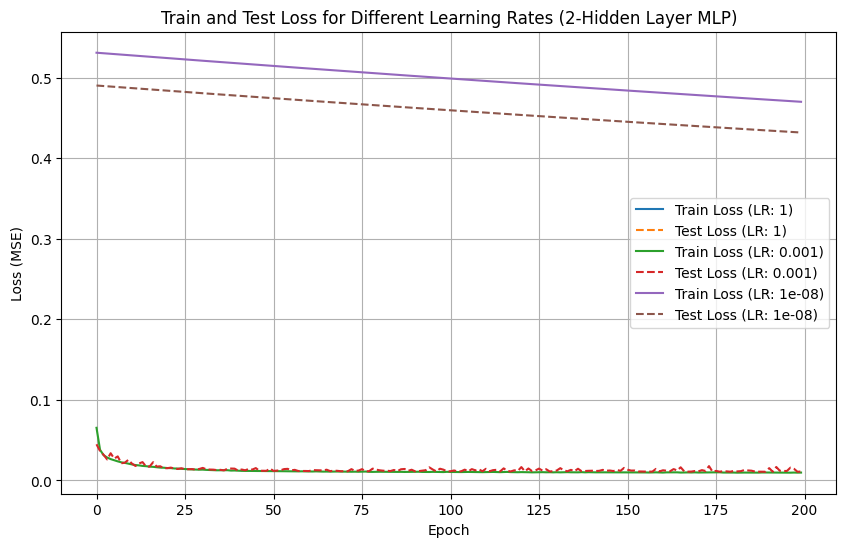

In [ ]:
class MLP_2Hidden(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP_2Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


input_size = X_train.shape[1] * X_train.shape[2]
hidden_size1 = 100
hidden_size2 = 50
output_size = 1
num_epochs = 200
batch_size = 32

learning_rates = [1, 0.001, 10**(-8)]

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results_2hidden = {}

for lr in learning_rates:
    print(f"\nTraining 2-hidden layer MLP with learning rate: {lr}")
    model_2hidden = MLP_2Hidden(input_size, hidden_size1, hidden_size2, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model_2hidden.parameters(), lr=lr)

    train_losses = []
    test_losses = []


    for epoch in tqdm(range(num_epochs), desc=f'Training (LR: {lr})'):
        model_2hidden.train()
        running_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model_2hidden(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_dataset)
        train_losses.append(epoch_train_loss)

        model_2hidden.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model_2hidden(inputs)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item() * inputs.size(0)
        epoch_test_loss = running_test_loss / len(test_dataset)
        test_losses.append(epoch_test_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

    # Save weights
    weight_filename = f'mlp_2hidden_weights_lr_{lr}.pth'
    torch.save(model_2hidden.state_dict(), weight_filename)
    print(f"Weights saved to {weight_filename}")

    results_2hidden[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'model_state_dict': model_2hidden.state_dict()
    }

plt.figure(figsize=(10, 6))
for lr, result in results_2hidden.items():
    plt.plot(result['train_losses'], label=f'Train Loss (LR: {lr})')
    plt.plot(result['test_losses'], label=f'Test Loss (LR: {lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates (2-Hidden Layer MLP)')
plt.legend()
plt.grid(True)
plt.show()

###Comparing Weights